In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
data = pd.read_excel('E:/Sales.xlsx')

In [9]:
data.head()

,Billing Date,Customer,Material Number,Material Group,Qty,UoM,Net Value in Doc Currency
0,2019-06-02,10000003,100099,501,1920.0,KAR,1366867.14
1,2019-06-02,10000003,100101,503,1170.0,KAR,832934.68
2,2019-06-02,10000003,100107,504,690.0,KAR,491217.89
3,2019-06-02,10000003,100109,505,90.0,KAR,64071.90
4,2019-06-02,10000003,100105,503B,330.0,KAR,234930.30


In [10]:
# data['Billing Date'] = pd.to_datetime(data['Billing Date'])

In [11]:
data.shape

(152773, 7)

In [12]:
data.count()

Billing Date                 152773
Customer                     152773
Material Number              152773
Material Group               152683
Qty                          152773
UoM                          152773
Net Value in Doc Currency    152773
dtype: int64

In [13]:
data.head()

,Billing Date,Customer,Material Number,Material Group,Qty,UoM,Net Value in Doc Currency
0,2019-06-02,10000003,100099,501,1920.0,KAR,1366867.14
1,2019-06-02,10000003,100101,503,1170.0,KAR,832934.68
2,2019-06-02,10000003,100107,504,690.0,KAR,491217.89
3,2019-06-02,10000003,100109,505,90.0,KAR,64071.90
4,2019-06-02,10000003,100105,503B,330.0,KAR,234930.30


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152773 entries, 0 to 152772
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Billing Date               152773 non-null  datetime64[ns]
 1   Customer                   152773 non-null  int64         
 2   Material Number            152773 non-null  object        
 3   Material Group             152683 non-null  object        
 4   Qty                        152773 non-null  float64       
 5   UoM                        152773 non-null  object        
 6   Net Value in Doc Currency  152773 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 8.2+ MB


In [232]:
data = data.dropna()

In [15]:
# -9 is to remove sec, min & hour from format
data['Billing Date'] = data['Billing Date'].apply(lambda x: str(x)[:-9])  
data = data.groupby('Billing Date')['Net Value in Doc Currency'].sum().reset_index()
data.head()

,Billing Date,Net Value in Doc Currency
0,2019-04-01,50648642.57
1,2019-04-02,49487702.60
2,2019-04-03,58869847.96
3,2019-04-04,61066072.85
4,2019-04-05,60422859.61


In [16]:
data['Sales_diff'] = data['Net Value in Doc Currency'].diff()
data.shape

(91, 3)

In [17]:
data.head()

,Billing Date,Net Value in Doc Currency,Sales_diff
0,2019-04-01,50648642.57,NaN
1,2019-04-02,49487702.60,-1160939.97
2,2019-04-03,58869847.96,9382145.36
3,2019-04-04,61066072.85,2196224.89
4,2019-04-05,60422859.61,-643213.24


In [18]:
data = data.dropna()

Text(0, 0.5, 'Diff')

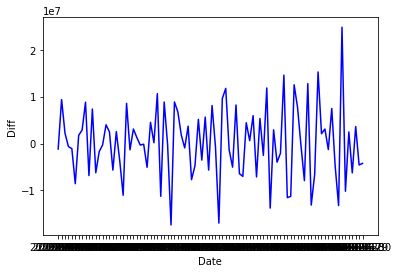

In [19]:
plt.plot(data['Billing Date'] , data['Sales_diff'] , color='Blue')
plt.xlabel('Date')
plt.ylabel('Diff')

# Predict for 1 future date

In [237]:
# dt_data = data.set_index('Billing Date').drop('Net Value in Doc Currency' , axis = 1)
# dt_data.dropna(axis = 0)
# dt_data.head()

In [20]:
# taking 15 days as lookback
for i in range(1 , 16):
    col = 'lag_' + str(i)
    data[col] = data['Sales_diff'].shift(i)
    
data = data.dropna().reset_index(drop=True)
data.head()

,Billing Date,Net Value in Doc Currency,Sales_diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15
0,2019-04-17,63069820.94,2476806.48,4004410.68,-274677.10,-1713113.84,-6214129.37,7358203.59,-6818769.87,8813581.75,2888627.99,1749793.80,-8545099.89,-1078672.89,-643213.24,2196224.89,9382145.36,-1160939.97
1,2019-04-18,57417478.86,-5652342.08,2476806.48,4004410.68,-274677.10,-1713113.84,-6214129.37,7358203.59,-6818769.87,8813581.75,2888627.99,1749793.80,-8545099.89,-1078672.89,-643213.24,2196224.89,9382145.36
2,2019-04-19,59960667.17,2543188.31,-5652342.08,2476806.48,4004410.68,-274677.10,-1713113.84,-6214129.37,7358203.59,-6818769.87,8813581.75,2888627.99,1749793.80,-8545099.89,-1078672.89,-643213.24,2196224.89
3,2019-04-20,56352448.08,-3608219.09,2543188.31,-5652342.08,2476806.48,4004410.68,-274677.10,-1713113.84,-6214129.37,7358203.59,-6818769.87,8813581.75,2888627.99,1749793.80,-8545099.89,-1078672.89,-643213.24
4,2019-04-21,45337782.65,-11014665.43,-3608219.09,2543188.31,-5652342.08,2476806.48,4004410.68,-274677.10,-1713113.84,-6214129.37,7358203.59,-6818769.87,8813581.75,2888627.99,1749793.80,-8545099.89,-1078672.89


In [21]:
# Just predict net worth on last date & compare
X_test = data.iloc[[-1]]
y_test = X_test['Net Value in Doc Currency']
X_test.drop(['Net Value in Doc Currency' , 'Billing Date'] , axis = 1 , inplace = True)
X_test.head()

,Sales_diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15
74,-4222416.94,-4564028.55,3626696.92,-6248510.58,2479960.24,-10157764.82,24790713.81,-13204133.78,-4831902.57,7485924.97,-1278581.14,3097617.63,2102590.36,15262964.59,-6606465.28,-13106653.61


In [22]:
X_test.shape

(1, 16)

In [23]:
X_train = data.drop(index=data.index[-1], axis=0)
y_train = X_train['Net Value in Doc Currency']
X_train.drop(['Net Value in Doc Currency' , 'Billing Date'] , axis = 1 , inplace = True)

In [24]:
print(X_test.shape , y_test.shape , X_train.shape , y_train.shape)

(1, 16) (1,) (74, 16) (74,)


### Linear regression

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)

In [26]:
print(y_test)
print(y_pred)

74    69357869.46
Name: Net Value in Doc Currency, dtype: float64
[59916348.35031406]


### Random Forest regression

In [27]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor().fit(X_train,y_train)
y_pred = model.predict(X_test)

In [28]:
print(y_test)
print(y_pred)

74    69357869.46
Name: Net Value in Doc Currency, dtype: float64
[55639141.33899996]


### Knn Regressor

In [29]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor().fit(X_train,y_train)
y_pred = model.predict(X_test)

In [30]:
print(y_test)
print(y_pred)

74    69357869.46
Name: Net Value in Doc Currency, dtype: float64
[54592069.89199997]


### Decision Tree regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(X_train,y_train)
y_pred = model.predict(X_test)

In [32]:
print(y_test)
print(y_pred)

74    69357869.46
Name: Net Value in Doc Currency, dtype: float64
[55018739.32000002]


------------------------------------------------------Process Ends-------------------------------------------------------------

# Split into train test data(80 - 20)

As in splitting we are giving random shuffle to data model accuracy is low.
So, above method is more accurate.

In [33]:
X = data.drop(['Net Value in Doc Currency' , 'Billing Date'] , axis = 1)
y = data['Net Value in Doc Currency']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state = 15)

### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)

In [36]:
print('r2 score:' , metrics.r2_score(y_test,y_pred))

r2 score: 0.6170440185556463


### Random Forest Regression

In [37]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor().fit(X_train,y_train)
y_pred = model.predict(X_test)

In [38]:
print('r2 score:' , metrics.r2_score(y_test,y_pred))

r2 score: 0.475029255848189


### Knn Regression

In [39]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor().fit(X_train,y_train)
y_pred = model.predict(X_test)

In [40]:
print('r2 score:' , metrics.r2_score(y_test,y_pred))

r2 score: 0.3888621197019846


### Decision Tree Regression

In [41]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(X_train,y_train)
y_pred = model.predict(X_test)

In [42]:
# Accuracy is small bcz random state is zero
# By removing random state accuracy can be increased
print('r2 score:' , metrics.r2_score(y_test,y_pred))

r2 score: 0.1974180181180354


In [50]:
dates = data['Billing Date'].tolist()
print(dates[-8:])

['2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28', '2019-06-29', '2019-06-30']


In [71]:
import matplotlib.pyplot as plt
# Create a function to plot time series data
def plot_time_series(timesteps , values , color , format='.' , label=None):
  # Plot the series
    plt.plot(timesteps, values, format, label=label , color = color)
    plt.xlabel("Time")
    plt.ylabel("Price")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(False)

In [44]:
import tensorflow as tf
def upper_lower(y_true , y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    upper = y_pred + (y_pred/10)
    lower = y_pred - (y_pred/10)
    return upper , lower

In [45]:
upper , lower = upper_lower(y_test , y_pred)

In [53]:
y_test.shape , y_pred.shape

((8,), (8,))

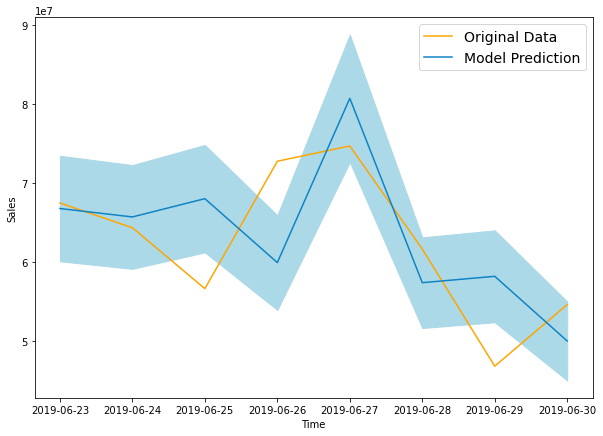

In [74]:
fig = plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps = dates[-8:] , values = np.array(y_test) , format="-", label="Original Data" , color = 'orange')
plot_time_series(timesteps = dates[-8:] , values = y_pred.tolist() , format="-", label="Model Prediction" , color = '#0E83C5')
plt.fill_between(x = dates[-8:] , y1 = upper , y2 = lower , color = '#ACD9E7')
plt.ylabel('Sales')
fig.savefig("Decision Tree.png")

In [65]:
print(upper)
print(dates[-8:])
print(lower)

tf.Tensor(
[73493050. 72319610. 74864750. 65956736. 88842744. 63159228. 64049084.
 55034810.], shape=(8,), dtype=float32)
['2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28', '2019-06-29', '2019-06-30']
tf.Tensor(
[60130676. 59170590. 61252976. 53964600. 72689510. 51675732. 52403796.
 45028480.], shape=(8,), dtype=float32)


In [63]:
date = dates[-8:]
print(date)

2019-06-23
